In [185]:
import numpy as np
import pandas as pd
detailed = pd.read_csv('./outputs/insta_detailed.csv')

### likes column
* issue1: has unknown values
* issue2: object datatype

In [164]:
detailed['likes'].unique()

array(['34874', '32651', '28240', '21630', '27116', '52240', '22329',
       '24239', '52132', '6140', '53115', '8083', '66684', '19311',
       '22414', '37398', '32824', '9378', '46368', '7748', '6340', '7663',
       'unknown', '11920', '13543', '14304', '7730', '20859', '6886',
       '13165', '873', '10223', '16288', '3628', '7327', '12760', '6040',
       '7387', '23699', '33257', '21943', '21373', '8058', '7788',
       '15393', '15543', '15531', '14434', '23496', '25290', '23144',
       '14800', '14991', '20703', '17490', '16667', '480', '996', '580',
       '971', '373', '1945', '1407', '648', '1618', '929', '1015', '1934',
       '1096', '1483', '1553', '1772', '1183', '1453', '1651', '1437',
       '2357', '1990', '1944', '1578', '1620', '1134', '2706', '1408',
       '2802', '1544', '1211', '1378', '9566', '1540', '1688', '5163',
       '2164', '2353', '3653', '12987', '3771', '1902', '5463', '2467',
       '20119', '3842', '4296', '2645', '4405', '9447', '8098', '2634',
 

In [165]:
(detailed['likes'] == 'unknown').sum()

81

<AxesSubplot:>

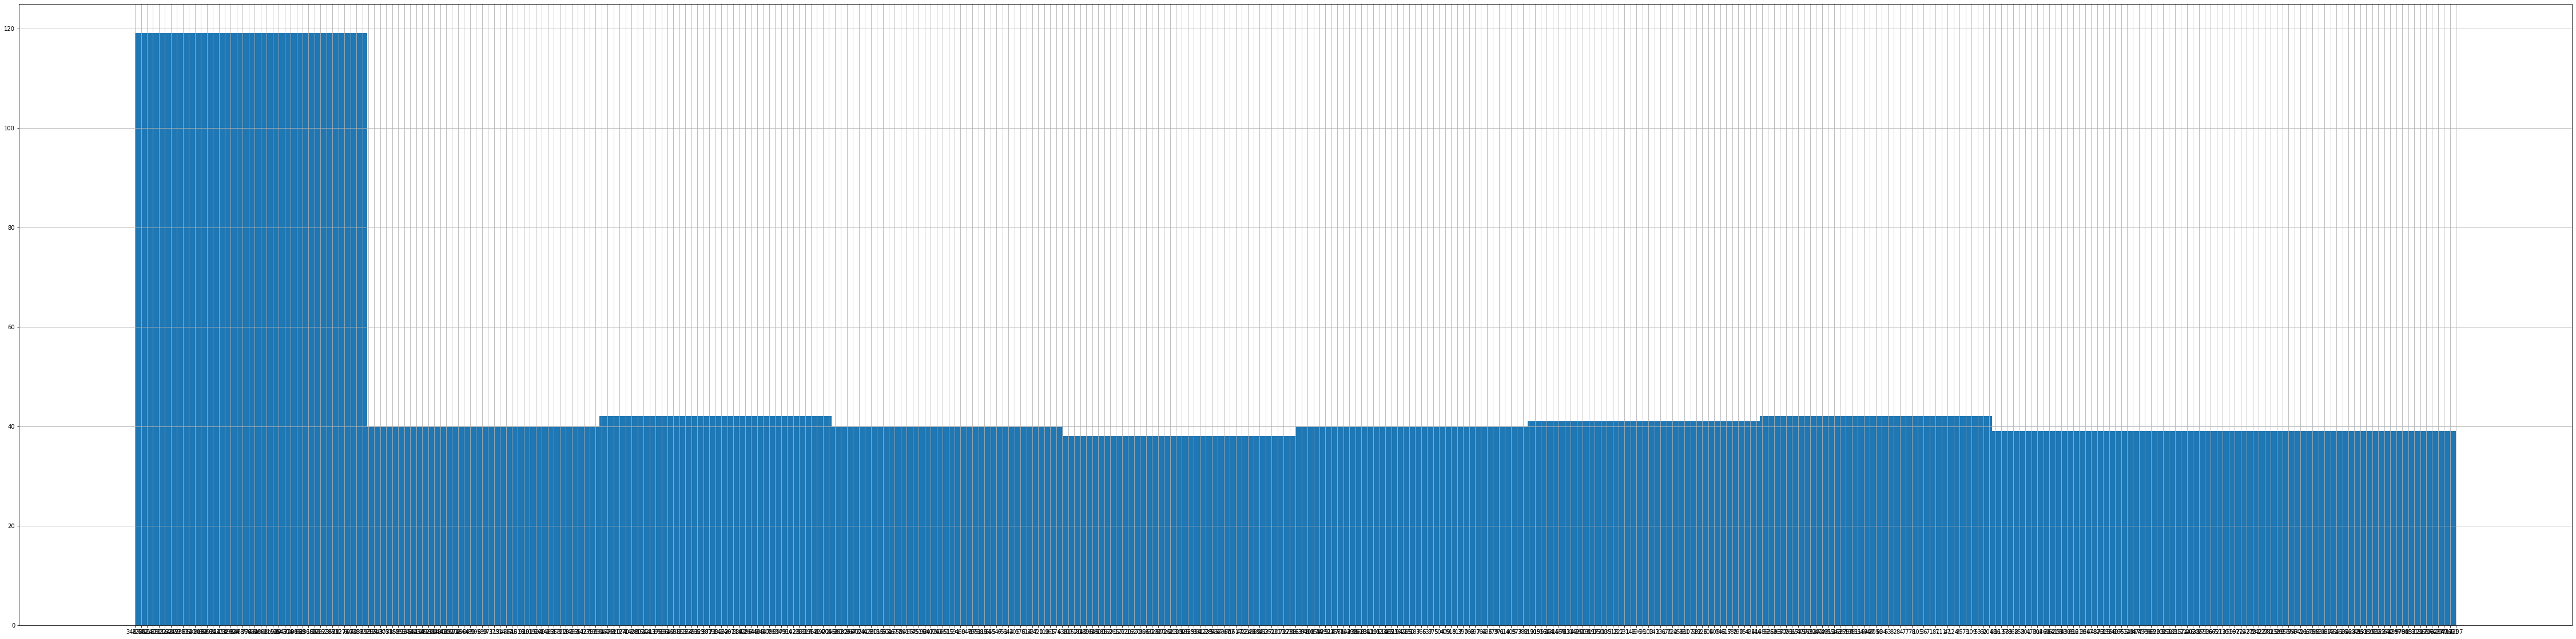

In [166]:
detailed['likes'].hist(figsize=(80,20))

* solution1: replace unknown with median

In [167]:
likes = detailed['likes'].values

In [168]:
#median likes for each user
median = []
for i in range(0,len(likes),20):
    data = []
    for j in range(i, i+20):
        try:
            data.append(int(likes[j]))
        except:
            continue
    median.append(int(np.median(data)))

In [169]:
for i in range(len(likes)):
    if likes[i] == 'unknown':
        j = int(i/20)
        likes[i] = median[j]

In [170]:
(detailed['likes'] == 'unknown').sum()

0

* solution2: convert to int

In [171]:
detailed['likes'] = detailed['likes'].astype(str).astype(int)

In [197]:
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


### datetime column
* extraxt date and time from datetime column

In [173]:
detailed['datetimes']

0      2022-04-13T18:55:14.000Z
1      2022-04-13T14:51:13.000Z
2      2022-04-12T17:04:57.000Z
3      2022-04-12T14:46:09.000Z
4      2022-04-11T17:17:21.000Z
                 ...           
475    2021-12-11T12:43:30.000Z
476    2021-11-23T15:46:53.000Z
477    2021-11-16T17:57:26.000Z
478    2021-11-08T16:42:58.000Z
479    2021-11-06T15:53:32.000Z
Name: datetimes, Length: 480, dtype: object

In [174]:
date = []
time = []
for i in range(detailed['datetimes'].shape[0]):
    date.append(detailed['datetimes'][i].split('T')[0])
    time.append(detailed['datetimes'][i].split('T')[1].split('.')[0])

In [175]:
detailed['date'] = date
detailed['time'] = time

In [176]:
# drop datetime
detailed.drop(['datetimes'] , axis = 1,inplace = True)

In [196]:
# check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


### captions column
* has null values

In [191]:
detailed['captions'] = detailed['captions'].fillna('empty caption')

In [195]:
#check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


In [198]:
detailed

,username,post,likes,type,captions,date,time
0,sarahh.hany,https://www.instagram.com/p/CcTVHc6gOro/,34874,clip,Negative Self Talk !,2022-04-13,18:55:14
1,sarahh.hany,https://www.instagram.com/p/CcS5ECgABzx/,32651,clip,Styling my New shirt from Stradivarius 💭,2022-04-13,14:51:13
2,sarahh.hany,https://www.instagram.com/p/CcQjcnYsAWF/,28240,clip,Outfit ideas 🖤,2022-04-12,17:04:57
3,sarahh.hany,https://www.instagram.com/p/CcQSpf5gBJv/,21630,clip,ازاي نحاول نتخلص من الشعور السئ او ال bad mood,2022-04-12,14:46:09
4,sarahh.hany,https://www.instagram.com/p/CcOASy6g3Tq/,27116,clip,Enjoy your own company!,2022-04-11,17:17:21
...,...,...,...,...,...,...,...
475,yomnasfood,https://www.instagram.com/p/CXV834nN_lz/,20714,photo,First time to post a regular photo of me😳👉🏼👈🏼,2021-12-11,12:43:30
476,yomnasfood,https://www.instagram.com/p/CWn7beKF_LB/,47631,clip,The most requested video ever😳 here’s how i ma...,2021-11-23,15:46:53
477,yomnasfood,https://www.instagram.com/p/CWWIb19F4TW/,14293,clip,Milk bread 🍞\nRecipe:\n- 2 1/2 cups flour/ ٢ ك...,2021-11-16,17:57:26
478,yomnasfood,https://www.instagram.com/p/CWBZ_kIlicj/,7297,clip,تقريبا دي اكتر حاجة انا متحمسالها في شهر نوڤمب...,2021-11-08,16:42:58


### date column
* datatype is object

In [199]:
detailed['date']= pd.to_datetime(detailed['date'])

In [200]:
#check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  480 non-null    object        
 1   post      480 non-null    object        
 2   likes     480 non-null    int64         
 3   type      480 non-null    object        
 4   captions  480 non-null    object        
 5   date      480 non-null    datetime64[ns]
 6   time      480 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 26.4+ KB


## Feature Extraction
* Engagement rate
* avg ER
* total likes per username

In [201]:
general = pd.read_csv('./outputs/insta_general.csv')

In [202]:
general

,index,username,name,category,followers,followings,posts,tier,avatar,avg_engagement_rate,total likes
0,0,sarahh.hany,Sarah hany - سارة هاني,lifestyle,689000.0,526.0,975,Macro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,4.389797,604914
1,1,fatimabadawyy,Fatima Badawy | فاتيما بدوي,lifestyle,175000.0,480.0,471,Mid-tier,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,5.432171,190126
2,2,lailaaezzat,Laïla🖤👽,lifestyle,165000.0,946.0,355,Mid-tier,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,11.144121,367756
3,3,habiba.gadalla,Habiba Gadalla | حبيبة,lifestyle,20300.0,1150.0,"2,937",Micro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,5.444089,22103
4,4,withhags,Hagar| Skincare Explained 👩🏻‍🔬,skincare,44200.0,918.0,151,Micro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,3.835068,33902
5,5,youssraelgamal,Youssra El Gamal يسرا الجمل,skincare,202000.0,1380.0,342,Mid-tier,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,2.678292,108203
6,6,self_theblog,self,skincare,39200.0,715.0,90,Micro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,5.640051,44218
7,7,dressupwithjay,Jessica Toutounji,fashion,79600.0,992.0,866,Mid-tier,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,4.113756,65491
8,8,jehadkhaled_,J E H A D • چهـــاد,fashion,16200.0,4276.0,"1,030",Micro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,8.682716,28132
9,9,manarhosem,Manar Hosem,fashion,13900.0,116.0,186,Micro,https://instagram.fcai21-2.fna.fbcdn.net/v/t51...,14.739928,40977


In [203]:
user = detailed['username'][detailed['likes'] == likes[10]]
user

Series([], Name: username, dtype: object)

In [204]:
users = general['username'].values

In [205]:
user_followers = {}
for i in range(len(users)):
    user_followers[users[i]] = general['followers'][users == users[i]][i]
    #followers.append(general['followers'][users == users[i]][i])

In [206]:
user_followers

{'sarahh.hany': 689000.0,
 'fatimabadawyy': 175000.0,
 'lailaaezzat': 165000.0,
 'habiba.gadalla': 20300.0,
 'withhags': 44200.0,
 'youssraelgamal': 202000.0,
 'self_theblog': 39200.0,
 'dressupwithjay': 79600.0,
 'jehadkhaled_': 16200.0,
 'manarhosem': 13900.0,
 '100looks_': 89800.0,
 'ayaabdelhamid': 432000.0,
 'makeupbylinaahmed': 4144.0,
 'dianafaaberg': 40500.0,
 'sarah_ihab_fitness': 37600.0,
 'farah_elwardany': 1942.0,
 'yomnasfood': 195000.0,
 'samarasfood': 39300.0,
 'malaksfoodjourney': 78600.0,
 'saraahmedxxo': 971.0,
 'salmaelkashef': 119000.0,
 'laylaghaleb': 274000.0,
 'samaawithcup': 14900.0,
 'sarahtaibah': 46800.0}

In [207]:
detailed

,username,post,likes,type,captions,date,time
0,sarahh.hany,https://www.instagram.com/p/CcTVHc6gOro/,34874,clip,Negative Self Talk !,2022-04-13,18:55:14
1,sarahh.hany,https://www.instagram.com/p/CcS5ECgABzx/,32651,clip,Styling my New shirt from Stradivarius 💭,2022-04-13,14:51:13
2,sarahh.hany,https://www.instagram.com/p/CcQjcnYsAWF/,28240,clip,Outfit ideas 🖤,2022-04-12,17:04:57
3,sarahh.hany,https://www.instagram.com/p/CcQSpf5gBJv/,21630,clip,ازاي نحاول نتخلص من الشعور السئ او ال bad mood,2022-04-12,14:46:09
4,sarahh.hany,https://www.instagram.com/p/CcOASy6g3Tq/,27116,clip,Enjoy your own company!,2022-04-11,17:17:21
...,...,...,...,...,...,...,...
475,yomnasfood,https://www.instagram.com/p/CXV834nN_lz/,20714,photo,First time to post a regular photo of me😳👉🏼👈🏼,2021-12-11,12:43:30
476,yomnasfood,https://www.instagram.com/p/CWn7beKF_LB/,47631,clip,The most requested video ever😳 here’s how i ma...,2021-11-23,15:46:53
477,yomnasfood,https://www.instagram.com/p/CWWIb19F4TW/,14293,clip,Milk bread 🍞\nRecipe:\n- 2 1/2 cups flour/ ٢ ك...,2021-11-16,17:57:26
478,yomnasfood,https://www.instagram.com/p/CWBZ_kIlicj/,7297,clip,تقريبا دي اكتر حاجة انا متحمسالها في شهر نوڤمب...,2021-11-08,16:42:58


In [208]:
likes = detailed['likes'].values.tolist()

In [209]:
detailed[detailed['likes'] == detailed['likes'].iloc[j]]['username'][j]

'fatimabadawyy'

In [212]:
er = []
avg_er = []
for i in range(0,len(likes),20):
    d = int(i/20)
    for j in range(i, i+20):
        user = detailed[detailed['likes'] == detailed['likes'].iloc[j]]['username'][j]
        er.append((likes[j]/user_followers[user])*100)
    avg_er.append((sum(er[i:i+20]))/20)

In [213]:
detailed['engagement_rate'] = er

In [214]:
avg_er_detailed = []
for e in avg_er:
    avg_er_detailed.extend([e]*20)

In [215]:
detailed['avg_engagement_rate'] = avg_er_detailed

In [216]:
general['avg_engagement_rate'] = avg_er

In [217]:
general.drop(12, axis=0, inplace = True)

In [218]:
detailed.drop(range(240,260), inplace = True)

In [219]:
general = general.reset_index()
detailed = detailed.reset_index()

In [220]:
total_likes = detailed.groupby(["username"])["likes"].sum()

In [221]:
tot_likes = []
for name in general['username'].values:
    tot_likes.append(total_likes[name])

In [222]:
general['total likes'] = tot_likes

In [223]:
general.to_csv('./outputs/insta_general.csv', index=False)

In [224]:
detailed.to_csv('./outputs/insta_detailed_processed.csv', index=False)

In [227]:
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                460 non-null    int64         
 1   username             460 non-null    object        
 2   post                 460 non-null    object        
 3   likes                460 non-null    int64         
 4   type                 460 non-null    object        
 5   captions             460 non-null    object        
 6   date                 460 non-null    datetime64[ns]
 7   time                 460 non-null    object        
 8   engagement_rate      460 non-null    float64       
 9   avg_engagement_rate  460 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 36.1+ KB
